# Real-world Data Wrangling

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

# **Answers **

  In todays world global warming is the main problem and we address this problem by research questions.

Following are the research question:

(1)Identify the trend in temperature  over the time of 22 years

(2) Identify the trend in  Carbon monoxide  over the  22 years period 

# **Dataset 1** -- Seoul Weather Data 

Q1 Why you picked the dataset

Q2 The gathering method

Q3 The names and significance of the variables in the dataset.

## Answers

(1) I picked the Seoul Weather Data because i want to see rise of temperature over the time.

(2) Data gathered from web 
URL =  'https://www.kaggle.com/api/v1/datasets/download/alfredkondoro/seoul-historical-weather-data-2024'

(3) As we interested in temperature changes over the time therefore following varaiables selected.

1-  Temp Variable :  which shows the temperature 

2-  Datetime Variable : which the date at which the temperature is recorded 

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1st data gathering and loading method

############################## First DataSet #########################################
# Seoul Weather Data load from url
# url return a zip file containing csv files

import requests as req
import zipfile as zf
from io import BytesIO 

url =  'https://www.kaggle.com/api/v1/datasets/download/alfredkondoro/seoul-historical-weather-data-2024'
response = req.get(url)

with zf.ZipFile(BytesIO(response.content)) as z:
    file_list = z.namelist()
   # print('files in zip =', file_list )

    csv_files = [ f  for f in file_list if f.endswith('.csv') ]

    count=len(csv_files)
    raw_df_wd = pd.DataFrame()
    i=0;
    
    while count > 0 :
        count= count -1
        if csv_files:
            with z.open(csv_files[i]) as f:
                temp_df = pd.read_csv(f)
                raw_df_wd = pd.concat([raw_df_wd , temp_df] , ignore_index = True)
                i =i+1
        else:
            print("No CSV files found.")


In [3]:
# Exporting raw weather data to CSV
raw_df_wd.to_csv('raw_df_wd.csv', index=False)

In [4]:
# assigning raw dataframe to new variable 
inprocess_df_wd=raw_df_wd

In [5]:
# showing five rows 
inprocess_df_wd.sort_values(by='datetime', ascending= False).head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
10971,seoul,2024-01-01,7.3,-0.2,3.0,6.6,-2.8,1.7,0.5,84.7,...,8.6,5.0,10.0,2024-01-01T07:46:50,2024-01-01T17:23:42,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
10970,seoul,2023-12-31,4.4,0.8,2.3,3.1,-1.8,0.4,1.5,94.7,...,4.5,4.0,10.0,2023-12-31T07:46:38,2023-12-31T17:22:57,0.63,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"47111099999,47098099999,47112099999,4711909999..."
10969,seoul,2023-12-30,1.9,-0.9,0.5,-1.2,-3.5,-2.4,-1.0,90.1,...,1.8,1.0,10.0,2023-12-30T07:46:24,2023-12-30T17:22:12,0.60,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"47111099999,47098099999,47112099999,4711909999..."
10968,seoul,2023-12-29,4.5,-1.4,1.5,3.0,-3.5,-0.1,-3.3,70.2,...,8.8,4.0,10.0,2023-12-29T07:46:08,2023-12-29T17:21:29,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
10967,seoul,2023-12-28,4.1,-1.7,1.1,2.4,-3.4,0.0,-3.7,71.5,...,9.6,5.0,10.0,2023-12-28T07:45:50,2023-12-28T17:20:48,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."


In [6]:
inprocess_df_wd.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,NaN,NaN,NaN,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,NaN,NaN,NaN,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,NaN,NaN,NaN,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999..."
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,NaN,NaN,NaN,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999..."


# Dataset 2 - Air Pollution Seoul

Q1 Why you picked the dataset

Q2 The gathering method

Q3 The names and significance of the variables in the dataset.

## Answers

(1) I picked the air pollution dataset to see the rise in carbon monoxide(CO)  level in Seoul Air over the time.

(2) Reading from CSV file

(3) As we interested in CO level changes over the time therefore following varaiables selected.

1-  co Variable :  which shows the co value 

2-  dt Variable : which shows the date at which the co value is recorded 

In [7]:
#2nd data gathering and loading method


############################### Second Dataset ######################
### Air Pollution Dataset

raw_df_pd = pd.read_csv('seoul_air_1988_2021.csv')
raw_df_pd.head(5)


,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [8]:
# Exporting raw pollution data to CSV
raw_df_pd.to_csv('raw_df_pd.csv', index=False)

In [9]:
# assigning weather raw data to other variable
inprocess_df_pd=raw_df_pd

## 2. Assess data

## 1-Weather Data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### WD - Quality Issue 1:

In [10]:
# Inspecting the dataframe , checking null values

inprocess_df_wd.isnull().sum()

name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype           6923
snow                 2926
snowdepth            2717
windgust             7325
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation       5851
solarenergy          5851
uvindex              5851
severerisk          10250
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
dtype: int64

### WD - Quality Issue 2:

In [11]:
# - Inspecting the dataframe 
inprocess_df_wd.duplicated().sum()

3

### WD - Quality Issue 3: 

In [12]:
# Inspecting the dataframe

inprocess_df_wd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10972 non-null  object 
 1   datetime          10972 non-null  object 
 2   tempmax           10972 non-null  float64
 3   tempmin           10972 non-null  float64
 4   temp              10972 non-null  float64
 5   feelslikemax      10972 non-null  float64
 6   feelslikemin      10972 non-null  float64
 7   feelslike         10972 non-null  float64
 8   dew               10972 non-null  float64
 9   humidity          10972 non-null  float64
 10  precip            10972 non-null  float64
 11  precipprob        10972 non-null  int64  
 12  precipcover       10972 non-null  float64
 13  preciptype        4049 non-null   object 
 14  snow              8046 non-null   float64
 15  snowdepth         8255 non-null   float64
 16  windgust          3647 non-null   float6

In [13]:
# After the execution of above command , you can see the datatype of the column datetime is object instead of datatime

### WD - Tidiness Issue 1:

In [14]:
# Inspecting the dataframe 
inprocess_df_wd['stations']

0        47111099999,47112099999,47120099999,4711009999...
1        47111099999,47112099999,47120099999,4711009999...
2        47111099999,47112099999,47120099999,4711009999...
3        47111099999,47112099999,47120099999,4711009999...
4        47111099999,47112099999,47120099999,4711009999...
                               ...                        
10967    47111099999,47098099999,47112099999,4711909999...
10968    47111099999,47098099999,47112099999,4711909999...
10969    47111099999,47098099999,47112099999,4711909999...
10970    47111099999,47098099999,47112099999,4711909999...
10971    47111099999,47098099999,47112099999,4711909999...
Name: stations, Length: 10972, dtype: object

# 2. Assess data

## Air Pollution Data

### AP - Quality Issue 1

In [15]:
# Showing 5 rows
inprocess_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


In [16]:
# After the execution of above command ,You can see the columns contains the missing values

### AP - Quality Issue 2

In [17]:
inprocess_df_pd.isnull().sum()

dt             0
loc            0
lat            0
long           0
so2       117565
no2       128616
co        161948
o3        108206
pm10      947434
pm2.5    2228730
dtype: int64

In [18]:
# After the execution of above command ,You can see the columns contains the null values

### AP - Quality Issue 3

In [19]:
inprocess_df_pd.duplicated().sum()

0

In [20]:
# After the execution of above command ,You can see the total number of duplicated values

### AP - Quality Issue 4

In [21]:
inprocess_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984782 entries, 0 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dt      int64  
 1   loc     int64  
 2   lat     float64
 3   long    float64
 4   so2     float64
 5   no2     float64
 6   co      float64
 7   o3      float64
 8   pm10    float64
 9   pm2.5   float64
dtypes: float64(8), int64(2)
memory usage: 456.6 MB


In [22]:
# After the execution of above command , you can see datatype of column dt is int64 instead of datetime

### AP - Quality Issue 5

In [23]:
inprocess_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


In [24]:
# After executing the above command, you will notice a column named dt
# which is not a descriptive or proper column name

## AP - Tideness Issue  1

In [25]:
inprocess_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


In [26]:
# After executing the above command, dt column values are showing datetime but the format is not correct or not human readable.

## 3. Clean data

### Weather data

In [27]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

cleaning_df_wd = inprocess_df_wd

### WD-Quality Issue 1 - Solving

In [28]:
## showing total null values in each column
cleaning_df_wd.dropna()
cleaning_df_wd.isnull().sum()

name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype           6923
snow                 2926
snowdepth            2717
windgust             7325
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation       5851
solarenergy          5851
uvindex              5851
severerisk          10250
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
dtype: int64

### WD -Quality Issue 2 - Solving

In [29]:
# - Removing duplicate entries 
cleaning_df_wd.drop_duplicates(inplace=True)
cleaning_df_wd.duplicated().sum()

0

In [30]:
# duplicated values have been removed successfully

### WD -Quality Issue 3:  Solving

In [31]:
# changing the type of columns from object to datetime

cleaning_df_wd['sunrise'] = pd.to_datetime(cleaning_df_wd['sunrise']) ;
cleaning_df_wd['sunset'] = pd.to_datetime(cleaning_df_wd['sunset']) ;
cleaning_df_wd['datetime'] = pd.to_datetime(cleaning_df_wd['datetime']) ;

print(cleaning_df_wd['sunrise'].dtype)
print(cleaning_df_wd['sunset'].dtype)
print(cleaning_df_wd['datetime'].dtype)


datetime64[ns]
datetime64[ns]
datetime64[ns]


In [32]:
# datatype of the columns have been changed.

### WD -Tidiness Issue 1:  Solving

In [33]:

# split the column values
stations_split = cleaning_df_wd['stations'].str.split(',', expand=True)


In [34]:



# Optionally rename the new columns
stations_split.columns = [f'station_{i+1}' for i in range(stations_split.shape[1])]

# Join back to original dataframe
cleaning_df_wd = cleaning_df_wd.drop(columns=['stations']).join(stations_split)

In [35]:
cleaning_df_wd.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,station_11,station_12,station_13,station_14,station_15,station_16,station_17,station_18,station_19,station_20
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,None,None,None,None,None,None,None,None,None,None
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,None,None,None,None,None,None,None,None,None,None
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,None,None,None,None,None,None,None,None,None,None
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,None,None,None,None,None,None,None,None,None,None
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,None,None,None,None,None,None,None,None,None,None


In [36]:
## Dataset - Weather -Cleaned

## Exported to CSV

In [37]:
cleaning_df_wd.to_csv('cleaned_df_wd.csv', index=False)

## Cleaning -- Dataset 2 - Air Polution 

In [38]:
# assigning air pollution data to new variable
cleaning_df_pd= inprocess_df_pd

In [39]:
cleaning_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


In [40]:
cleaning_df_pd.sort_values('dt', ascending=False).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021123123,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021123123,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021123123,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021123123,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021123123,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


### AP- Quality Issue 1  - Solving

In [41]:
# removing null values
cleaning_df_pd.dropna(inplace=True)
cleaning_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1331611,2000021118,107,37.542043,127.047497,0.006,0.045,0.8,0.006,85.0,25.0
1331636,2000021119,107,37.542043,127.047497,0.006,0.053,0.9,0.001,107.0,41.0
1331661,2000021120,107,37.542043,127.047497,0.008,0.057,1.1,0.000,112.0,52.0
1331686,2000021121,107,37.542043,127.047497,0.010,0.054,0.9,0.001,117.0,62.0
1331711,2000021122,107,37.542043,127.047497,0.008,0.049,0.8,0.002,120.0,79.0


In [42]:
# After the execution of above command , all the missing  values have been removed.

### AP- Quality Issue 2  - Solving

In [43]:
cleaning_df_pd.isnull().sum()

dt       0
loc      0
lat      0
long     0
so2      0
no2      0
co       0
o3       0
pm10     0
pm2.5    0
dtype: int64

### AP - Quality Issue 3 - Solving

In [44]:
# - Removing duplicate entries 
cleaning_df_pd.drop_duplicates(inplace=True)
cleaning_df_pd.duplicated().sum()

0

In [45]:
# After the execution of above command , all the duplicated entries have been removed.

In [46]:
cleaning_df_pd.sort_values('dt', ascending=False).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021123123,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021123123,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021123123,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021123123,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021123123,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


In [47]:
cleaning_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597674 entries, 1331611 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dt      int64  
 1   loc     int64  
 2   lat     float64
 3   long    float64
 4   so2     float64
 5   no2     float64
 6   co      float64
 7   o3      float64
 8   pm10    float64
 9   pm2.5   float64
dtypes: float64(8), int64(2)
memory usage: 301.9 MB


In [48]:
cleaning_df_pd.sort_values('dt', ascending=False).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021123123,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021123123,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021123123,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021123123,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021123123,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


### AP - Quality Issue 4:  Solving

In [49]:
## changing the column type
cleaning_df_pd['dt'] = pd.to_datetime(cleaning_df_pd['dt'].astype(str), format='%Y%m%d%H')

In [50]:
print(cleaning_df_pd['dt'].dtype)

datetime64[ns]


In [51]:
# After the execution of above command , data type has been changed.

In [52]:
cleaning_df_pd.sort_values('dt', ascending=False).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021-12-31 23:00:00,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021-12-31 23:00:00,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021-12-31 23:00:00,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021-12-31 23:00:00,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021-12-31 23:00:00,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


In [53]:
cleaning_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597674 entries, 1331611 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   dt      datetime64[ns]
 1   loc     int64         
 2   lat     float64       
 3   long    float64       
 4   so2     float64       
 5   no2     float64       
 6   co      float64       
 7   o3      float64       
 8   pm10    float64       
 9   pm2.5   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 301.9 MB


### AP - Quality Issue 5:  Solving

In [54]:
cleaning_df_pd = cleaning_df_pd.rename(columns =  {'dt' : 'date' } )

In [55]:
cleaning_df_pd.sort_values('date', ascending=False).head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021-12-31 23:00:00,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021-12-31 23:00:00,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021-12-31 23:00:00,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021-12-31 23:00:00,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021-12-31 23:00:00,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


### AP - Tideness Issue 1 :  Solving

In [56]:
cleaning_df_pd.head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1331611,2000-02-11 18:00:00,107,37.542043,127.047497,0.006,0.045,0.8,0.006,85.0,25.0
1331636,2000-02-11 19:00:00,107,37.542043,127.047497,0.006,0.053,0.9,0.001,107.0,41.0
1331661,2000-02-11 20:00:00,107,37.542043,127.047497,0.008,0.057,1.1,0.000,112.0,52.0
1331686,2000-02-11 21:00:00,107,37.542043,127.047497,0.010,0.054,0.9,0.001,117.0,62.0
1331711,2000-02-11 22:00:00,107,37.542043,127.047497,0.008,0.049,0.8,0.002,120.0,79.0


# **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [57]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

removing_unnecessary_df_wd = cleaning_df_wd
removing_unnecessary_df_pd = cleaning_df_pd


In [58]:
# irrelavent columns have been removed successful because don't need them

In [59]:
removing_unnecessary_df_pd.sort_values('date', ascending=False).head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984781,2021-12-31 23:00:00,125,37.544989,127.134599,0.002,0.020,0.4,0.020,22.0,10.0
5984769,2021-12-31 23:00:00,113,37.654140,127.026801,0.002,0.019,0.6,0.023,24.0,7.0
5984757,2021-12-31 23:00:00,101,37.572021,127.002819,0.003,0.016,0.4,0.026,20.0,9.0
5984758,2021-12-31 23:00:00,102,37.564302,126.972863,0.003,0.020,0.4,0.023,20.0,11.0
5984759,2021-12-31 23:00:00,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0


In [60]:
# there are multiple locations , removing all location except 103 to align the date column with another dataset

removing_unnecessary_df_pd = removing_unnecessary_df_pd[ cleaning_df_pd['loc'] == 103 ]

In [61]:
removing_unnecessary_df_pd.head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1627649,2001-08-08 16:00:00,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1627674,2001-08-08 17:00:00,103,37.540037,127.002661,0.003,0.034,0.2,0.024,43.0,21.0
1627699,2001-08-08 18:00:00,103,37.540037,127.002661,0.003,0.028,0.2,0.018,36.0,20.0
1627724,2001-08-08 19:00:00,103,37.540037,127.002661,0.003,0.031,0.3,0.014,38.0,20.0
1627749,2001-08-08 20:00:00,103,37.540037,127.002661,0.004,0.035,0.3,0.013,35.0,16.0


In [62]:
removing_unnecessary_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159409 entries, 1627649 to 5984759
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    159409 non-null  datetime64[ns]
 1   loc     159409 non-null  int64         
 2   lat     159409 non-null  float64       
 3   long    159409 non-null  float64       
 4   so2     159409 non-null  float64       
 5   no2     159409 non-null  float64       
 6   co      159409 non-null  float64       
 7   o3      159409 non-null  float64       
 8   pm10    159409 non-null  float64       
 9   pm2.5   159409 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 13.4 MB


In [63]:
# Keep only the date (sets time to 00:00:00)
removing_unnecessary_df_pd['date'] = removing_unnecessary_df_pd['date'].dt.normalize() 
removing_unnecessary_df_pd.sort_values('date', ascending=False).head(5)

C:\Users\allfo\AppData\Local\Temp\ipykernel_25076\1220209876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removing_unnecessary_df_pd['date'] = removing_unnecessary_df_pd['date'].dt.normalize()


,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984759,2021-12-31,103,37.540037,127.002661,0.003,0.018,0.4,0.021,22.0,11.0
5984460,2021-12-31,103,37.540037,127.002661,0.002,0.009,0.3,0.031,23.0,7.0
5984185,2021-12-31,103,37.540037,127.002661,0.003,0.009,0.3,0.028,22.0,12.0
5984210,2021-12-31,103,37.540037,127.002661,0.003,0.007,0.3,0.030,21.0,8.0
5984235,2021-12-31,103,37.540037,127.002661,0.003,0.005,0.3,0.031,24.0,9.0


In [64]:
removing_unnecessary_df_pd = removing_unnecessary_df_pd.sort_values('date', ascending= True)

In [65]:
removing_unnecessary_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159409 entries, 1627649 to 5984759
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    159409 non-null  datetime64[ns]
 1   loc     159409 non-null  int64         
 2   lat     159409 non-null  float64       
 3   long    159409 non-null  float64       
 4   so2     159409 non-null  float64       
 5   no2     159409 non-null  float64       
 6   co      159409 non-null  float64       
 7   o3      159409 non-null  float64       
 8   pm10    159409 non-null  float64       
 9   pm2.5   159409 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 13.4 MB


In [66]:

# getting the first entry of every month
removing_unnecessary_df_pd = removing_unnecessary_df_pd.groupby(removing_unnecessary_df_pd['date'].dt.to_period('M')).first().reset_index(drop=True)

In [67]:
# sorting values by dt column
removing_unnecessary_df_pd.sort_values(by='date' , ascending=True ).head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,103,37.540037,127.002661,0.002,0.027,0.3,0.028,17.0,9.0
2,2001-10-01,103,37.540037,127.002661,0.004,0.017,0.3,0.018,9.0,5.0
3,2001-11-01,103,37.540037,127.002661,0.003,0.015,0.3,0.024,42.0,17.0
4,2001-12-01,103,37.540037,127.002661,0.007,0.046,0.2,0.010,66.0,35.0


In [68]:
removing_unnecessary_df_pd.sort_values(by='date' , ascending=False ).head(2)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
242,2021-12-01,103,37.540037,127.002661,0.003,0.008,0.3,0.026,19.0,10.0
241,2021-11-01,103,37.540037,127.002661,0.003,0.015,0.4,0.044,37.0,20.0


In [69]:
# total number of rows in pollution dataset
row_count = len(removing_unnecessary_df_pd)
row_count

243

In [70]:
# Sort by date
removing_unnecessary_df_pd = removing_unnecessary_df_pd.sort_values('date', ascending= True)
removing_unnecessary_df_pd.head()

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,103,37.540037,127.002661,0.002,0.027,0.3,0.028,17.0,9.0
2,2001-10-01,103,37.540037,127.002661,0.004,0.017,0.3,0.018,9.0,5.0
3,2001-11-01,103,37.540037,127.002661,0.003,0.015,0.3,0.024,42.0,17.0
4,2001-12-01,103,37.540037,127.002661,0.007,0.046,0.2,0.010,66.0,35.0


In [71]:
# getting first row of every month in dataset
# getting the first entry of every month
removing_unnecessary_df_pd = removing_unnecessary_df_pd.groupby(removing_unnecessary_df_pd['date'].dt.to_period('M')).first().reset_index(drop=True)
removing_unnecessary_df_pd.head(5)

,date,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,103,37.540037,127.002661,0.002,0.027,0.3,0.028,17.0,9.0
2,2001-10-01,103,37.540037,127.002661,0.004,0.017,0.3,0.018,9.0,5.0
3,2001-11-01,103,37.540037,127.002661,0.003,0.015,0.3,0.024,42.0,17.0
4,2001-12-01,103,37.540037,127.002661,0.007,0.046,0.2,0.010,66.0,35.0


In [72]:
removing_unnecessary_df_pd['date'] = removing_unnecessary_df_pd['date'].dt.strftime('%Y-%m')

In [73]:
# total number of rows in pollution dataset
row_count = len(removing_unnecessary_df_pd)
row_count 


243

In [74]:
#  filtering out columns so that we have only columns that we need in the weather data
removing_unnecessary_df_wd = removing_unnecessary_df_wd[['name' , 'datetime' , 'temp']] 
removing_unnecessary_df_wd.head(5)


,name,datetime,temp
0,seoul,1994-01-01,26.3
1,seoul,1994-01-02,36.2
2,seoul,1994-01-03,38.0
3,seoul,1994-01-04,30.1
4,seoul,1994-01-05,33.1


In [75]:
# renaming the column
removing_unnecessary_df_wd =removing_unnecessary_df_wd.rename(columns={'datetime':'date'} )
removing_unnecessary_df_wd.head(2)

,name,date,temp
0,seoul,1994-01-01,26.3
1,seoul,1994-01-02,36.2


In [76]:
# Sort by date
removing_unnecessary_df_wd = removing_unnecessary_df_wd.sort_values('date', ascending= True)

In [77]:
removing_unnecessary_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10969 entries, 0 to 10971
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    10969 non-null  object        
 1   date    10969 non-null  datetime64[ns]
 2   temp    10969 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 342.8+ KB


In [78]:
# getting the first entry of every month
removing_unnecessary_df_wd = removing_unnecessary_df_wd.groupby(removing_unnecessary_df_wd['date'].dt.to_period('M')).first().reset_index(drop=True)

In [79]:
# Filtering the weather data 
# We have Air pollution data from 2001-8-8 to 2021-12-31

removing_unnecessary_df_wd = removing_unnecessary_df_wd[ ( removing_unnecessary_df_wd['date'].dt.year >= 2001 ) & ( removing_unnecessary_df_wd['date'].dt.year <= 2021 )]

In [80]:
#  starting date in the weather data 2001-01-01
removing_unnecessary_df_wd.sort_values( by='date', ascending=True).head(2)

,name,date,temp
84,seoul,2001-01-01,22.2
85,seoul,2001-02-01,21.8


In [81]:
# filtering out the data
removing_unnecessary_df_wd = removing_unnecessary_df_wd[removing_unnecessary_df_wd['date'] >= '2001-08-01']

In [82]:
#  last date in the weather data 2021-11-01
removing_unnecessary_df_wd.sort_values( by='date', ascending=True).head(5)

,name,date,temp
91,seoul,2001-08-01,81.7
92,seoul,2001-09-01,77.3
93,seoul,2001-10-01,59.4
94,seoul,2001-11-01,54.7
95,seoul,2001-12-01,36.0


In [83]:
removing_unnecessary_df_wd['date'] = removing_unnecessary_df_wd['date'].dt.strftime('%Y-%m')

In [84]:
removing_unnecessary_df_wd.sort_values( by='date', ascending=True).head(5)

,name,date,temp
91,seoul,2001-08,81.7
92,seoul,2001-09,77.3
93,seoul,2001-10,59.4
94,seoul,2001-11,54.7
95,seoul,2001-12,36.0


In [85]:
row_count= len(removing_unnecessary_df_wd)
print('total rows in weather data =',row_count)

total rows in weather data = 245


In [86]:
row_count= len(cleaning_df_pd)
print('total rows in Pollution data =',row_count)

total rows in Pollution data = 3597674


In [87]:
# drop irrelavent columns loc , lat , long
removing_unnecessary_df_pd.drop(columns=['loc', 'lat', 'long'],inplace=True)
removing_unnecessary_df_pd.head(2)

,date,so2,no2,co,o3,pm10,pm2.5
0,2001-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09,0.002,0.027,0.3,0.028,17.0,9.0


In [88]:
#  starting date in the pollution data 2001-8-8
removing_unnecessary_df_pd.sort_values( by='date', ascending=True).head(5)

,date,so2,no2,co,o3,pm10,pm2.5
0,2001-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09,0.002,0.027,0.3,0.028,17.0,9.0
2,2001-10,0.004,0.017,0.3,0.018,9.0,5.0
3,2001-11,0.003,0.015,0.3,0.024,42.0,17.0
4,2001-12,0.007,0.046,0.2,0.010,66.0,35.0


In [89]:
# last date in the polution 2021-12-31
removing_unnecessary_df_pd.sort_values( by='date', ascending=False).head(2)

,date,so2,no2,co,o3,pm10,pm2.5
242,2021-12,0.003,0.008,0.3,0.026,19.0,10.0
241,2021-11,0.003,0.015,0.4,0.044,37.0,20.0


In [90]:
removing_unnecessary_df_pd.head(5)

,date,so2,no2,co,o3,pm10,pm2.5
0,2001-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09,0.002,0.027,0.3,0.028,17.0,9.0
2,2001-10,0.004,0.017,0.3,0.018,9.0,5.0
3,2001-11,0.003,0.015,0.3,0.024,42.0,17.0
4,2001-12,0.007,0.046,0.2,0.010,66.0,35.0


In [91]:
row_count = len(removing_unnecessary_df_pd)
print(row_count)

243


In [92]:
# Exporting Weather Data 
removing_unnecessary_df_wd.to_csv('removing_unnecessary_df_wd.csv', index=False)

In [93]:
# Exporting pollution Data 
removing_unnecessary_df_pd.to_csv('removing_unnecessary_df_pd.csv', index=False)

In [94]:
# Perform inner join on the 'date' column
combined_df = pd.merge(
    removing_unnecessary_df_wd,
    removing_unnecessary_df_pd,
    on='date',
    how='inner'  # This is the crucial change for inner join
)

# Verify the results
print(f"Number of rows after inner join: {len(combined_df)}")
print("Sample of combined data:")
print(combined_df.head(5))

Number of rows after inner join: 243
Sample of combined data:
    name     date  temp    so2    no2   co     o3  pm10  pm2.5
0  seoul  2001-08  81.7  0.003  0.035  0.2  0.027  54.0   32.0
1  seoul  2001-09  77.3  0.002  0.027  0.3  0.028  17.0    9.0
2  seoul  2001-10  59.4  0.004  0.017  0.3  0.018   9.0    5.0
3  seoul  2001-11  54.7  0.003  0.015  0.3  0.024  42.0   17.0
4  seoul  2001-12  36.0  0.007  0.046  0.2  0.010  66.0   35.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [95]:

# Export to CSV
combined_df.to_csv('combined_data.csv', index=False)

# 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

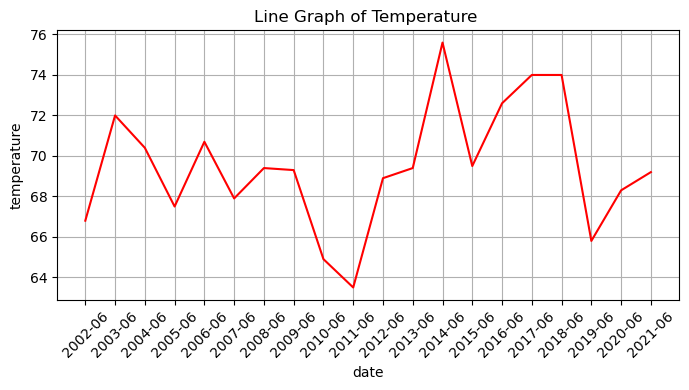

In [96]:
#Visual 1 

df = combined_df[pd.to_datetime(combined_df['date']).dt.month == 6]
plt.figure(figsize=(7,4))
plt.plot(df['date'], df['temp'], 'r')
plt.title('Line Graph of Temperature ')
plt.ylabel('temperature')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.grid(True)
plt.show()


My Research questions is 

1)Identify the trend in temperature over the time of 22 years 

The current graph do not reflect the consistent trend(upward or downward) in temperature therefore need more datasets for meaningful results

In [ ]:
df = combined_df[pd.to_datetime(combined_df['date']).dt.month == 6]
plt.figure(figsize=(7, 4))
plt.plot(df['date'], df['co'], 'b')
plt.title('Line Graph of CO in June')
plt.ylabel('CO')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

My Research questions is 

1)Identify the trend in CO over the time of 22 years 

The current graph do not reflect the consistent trend(upward or downward) in CO therefore need more datasets for meaningful results

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

## Answer

The current graphs do not reflect the expected trends(upward or downward) in temperature and CO over the 22-year period. If i have more time , i will download and compare additional datasets from reliable sources to validate and refine the analysis.